# Charting in Python: Graphics Lies, Misleading Visuals

This study is an assignment of "Applied Data Science with Python" by University of Michigan. This assignment of the course draws heavily on Alberto Cairo’s  book, __The Truthful Art__, where five qualities of great visualizations (truthful, functional, beautiful, insightful, and enlightening ) are explained. Assignment instruction specified that "locate an example of a misleading visual that uses one or more of the mechanisms for misleading that Cairo outlines in his book". So the study was taken shape from the instructions.

While making a small search in online newspapers, I saw a chart in today's print (13.09.2019) of "<a href="http://egazete.sabah.com.tr/eGazete/www_sabah_com_tr/1/2019/09/13">Sabah</a>",which is one of the bestseller newspaper in Turkey. The chart is related to the decision of the Republic of Turkey's Central Bank's (TCMB) 'Policy Interest Rates'. We learned from the news that TCMB decreased the interest rates from 19.65% to 16.50%. But the chart doesn't show this news exactly.

<img src="https://github.com/msklc/Charting-in-Python-Graphics-Lies-Misleading-Visuals/blob/master/sabah_13092019.JPG?raw=true" width="600">


The intended audience of the newspaper is the general public. But generally, some news, especially related to the economy, are announced more softly. Also sometimes, details or some parts of the news are hidden (and/or not explained clearly) deliberately. I think this chart one of the example of this "Misleading Visuals".

To understand the news correctly, firstly I visited the <a href="https://www.tcmb.gov.tr/wps/wcm/connect/TR/TCMB+TR/Main+Menu/Temel+Faaliyetler/Para+Politikasi/Merkez+Bankasi+Faiz+Oranlari/1+Hafta+Repo">__TCMB__</a> web sites and scraped the  'Policy Interest Rates' data which include from 2010 to today by BeautifulSoup. 

In [113]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

#Scraping the data from tcmb.gov.tr
url = "https://www.tcmb.gov.tr/wps/wcm/connect/TR/TCMB+TR/Main+Menu/Temel+Faaliyetler/Para+Politikasi/Merkez+Bankasi+Faiz+Oranlari/1+Hafta+Repo"
response = requests.get(url)
data = response.text
soup = BeautifulSoup(data,'lxml')
table = soup.find_all('table')[0]

#Creating DataFrame
df_tcmb = pd.read_html(str(table))[0]
df_tcmb.columns = df_tcmb.iloc[0] #set first row as columns name
df_tcmb = df_tcmb[1:] #drop first row
df_tcmb=df_tcmb.reset_index(drop=True) #reset index
df_tcmb['Tarih']= pd.to_datetime(df_tcmb['Tarih']) #Set column type
df_tcmb['Borç Verme']= df_tcmb['Borç Verme'].astype('float64')  #Set column type
df_tcmb.head()

,Tarih,Borç Alma,Borç Verme
0,2010-05-20,-,7.00
1,2010-12-17,-,6.50
2,2011-01-21,-,6.25
3,2011-05-08,-,5.75
4,2012-12-19,-,5.50


After visualizing the data, differences between the chart of the news and chart of the real-data is seen clearly.

C:\Users\WIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


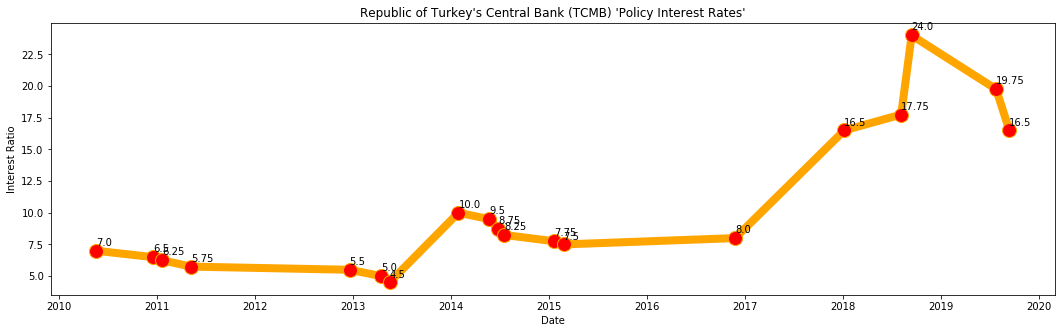

In [114]:
#visualization with matplotlib
fig, axs = plt.subplots(1,1, figsize=(18,5))
x = df_tcmb['Tarih']
y = df_tcmb['Borç Verme']
plt.plot(x, y,linestyle="solid", linewidth=8, color='orange', marker='o',markerfacecolor='red', markersize=14,)

#Add Text to markers
for n in range(df_tcmb.shape[0]):
    plt.annotate(s=df_tcmb['Borç Verme'][n], xy=(df_tcmb['Tarih'][n], df_tcmb['Borç Verme'][n]+0.4))

#labels
plt.xlabel("Date")
plt.ylabel("Interest Ratio")

#title
plt.title("Republic of Turkey's Central Bank (TCMB) 'Policy Interest Rates'")

fig.show()

### We can mechanize the misleadings;
- In x-axis of the chart does not compatible with the real-time. The time period of 24%-19.75% is more than 3 times longer than the time period of 17.75%-24%. But the reality of the "living with high-interest rates" is hidden in the chart.
- Also because of the manipulating in the x-axis, as if understood that the peak of the interest rate (24%) continues a small time period. But in real-time, "living with high-interest rates" continued nearly a year and this period should be shown in chart clearly.
- In chart, it is shown that there is a point (value) exist between the time period of 17.75%-24%. But in real data, there isn't any value exists between this period. With the chart, as if understood that reached the peak of the interest rates (24%) slowly. The reality of sharp increase is hidden with unreal data in the chart.
- Lastly, while looking at the chart it is understood that with the TCMB' decrease decision the interest rates come back the normal level. Because the chart contains the last 2 years period. If looking at the timeline more widely, it is understood that the interest rates are still high.

<img src="https://github.com/msklc/Charting-in-Python-Graphics-Lies-Misleading-Visuals/blob/master/compare_charts.JPG?raw=true" width="400">

Visualization tells us much more information quickly than text in addition to permanent. It is an easy way to explain the long texts, numbers, correlations. But like this example, sometimes it can be used for misleading the public.